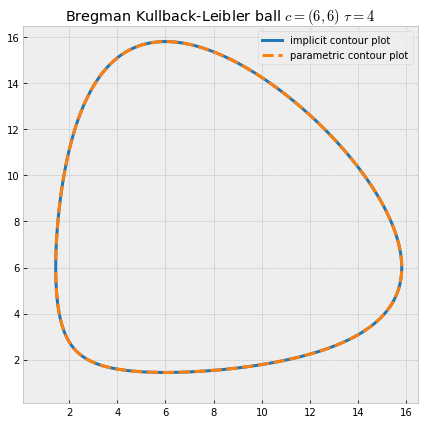

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.special.lambertw as lambertw

# Parametric Bregman KL ball of center (cx,cy) and radius r
def klball(cx, cy, r, nb=250):
    x = np.zeros(4*nb)
    y = np.zeros(4*nb)
    du=r/(nb-1)
    # top left quadrant: (x1, y2)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=0))
        y[i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=-1))
    # top right quadrant: (x2, y2)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[nb+i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=-1))
        y[nb+i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=-1))
    # bottom right quadrant: (x2, y1)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[2*nb+i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=-1))
        y[2*nb+i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=0))
    # bottom left quadrant: (x1, y1)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[3*nb+i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=0))
        y[3*nb+i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=0))
    
    return x,y

# Bregman ball center and radius
cx=6
cy=6
r=4

# implicit contour plot 
delta = 0.025
xrange = np.arange(0.1, 16.5, delta)
yrange = np.arange(0.1, 16.5, delta)
X, Y = np.meshgrid(xrange,yrange)
# F is one side of the equation, G is the other
F = X-cx+cx*np.log(cx/X)
G = r-(Y-cy+cy*np.log(cy/Y))

# parametric contour plot 
x, y = klball(cx, cy, r)

# figure
with plt.style.context("bmh"):
    plt.figure(figsize=(6,6))
    plt.contour(X, Y, (F - G), [0], colors=["tab:blue"], linewidths=[3])
    plt.plot(x, y, ls='--', lw=3, color= "tab:orange", label="parametric contour plot")
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.insert(0, Line2D([0], [0], color='tab:blue', lw=3))
    labels.insert(0, 'implicit contour plot')
    plt.legend(handles, labels)
    plt.title(r'Bregman Kullback-Leibler ball $c=({},{})$ $\tau={}$'.format(cx,cy,r))
    plt.tight_layout()
    plt.savefig("klbball.pdf")
    plt.show()

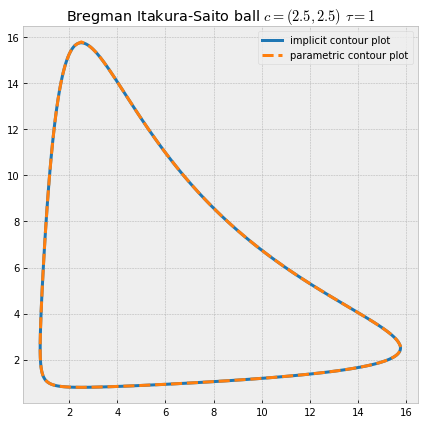

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.special.lambertw as lambertw

# Parametric Bregman IS ball of center (cx,cy) and radius r
def isball(cx, cy, r, nb=250):
    x = np.zeros(4*nb)
    y = np.zeros(4*nb)
    du=r/(nb-1)
    # top left quadrant: (x1, y2)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[i]=-cx/np.real(lambertw(-np.exp(-u-1), k=-1))
        y[i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=0))
    # top right quadrant: (x2, y2)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[nb+i]=-cx/np.real(lambertw(-np.exp(-u-1), k=0))
        y[nb+i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=0))
    # bottom right quadrant: (x2, y1)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[2*nb+i]=-cx/np.real(lambertw(-np.exp(-u-1), k=0))
        y[2*nb+i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=-1))
    # bottom left quadrant: (x1, y1)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[3*nb+i]=-cx/np.real(lambertw(-np.exp(-u-1), k=-1))
        y[3*nb+i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=-1))
    
    return x,y

# Bregman ball center and radius
cx=2.5
cy=2.5
r=1

# implicit contour plot 
delta = 0.025
xrange = np.arange(0.1, 16.5, delta)
yrange = np.arange(0.1, 16.5, delta)
X, Y = np.meshgrid(xrange,yrange)
# F is one side of the equation, G is the other
F = cx/X-np.log(cx/X)-1
G = r-(cy/Y-np.log(cy/Y)-1)

# parametric contour plot 
x, y = isball(cx, cy, r)

# figure
with plt.style.context("bmh"):
    plt.figure(figsize=(6,6))
    plt.contour(X, Y, (F - G), [0], colors=["tab:blue"], linewidths=[3])
    plt.plot(x, y, ls='--', lw=3, color= "tab:orange", label="parametric contour plot")
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.insert(0, Line2D([0], [0], color='tab:blue', lw=3))
    labels.insert(0, 'implicit contour plot')
    plt.legend(handles, labels)
    plt.title(r'Bregman Itakura-Saito ball $c=({},{})$ $\tau={}$'.format(cx,cy,r))
    plt.tight_layout()
    plt.savefig("isbball.pdf")
    plt.show()

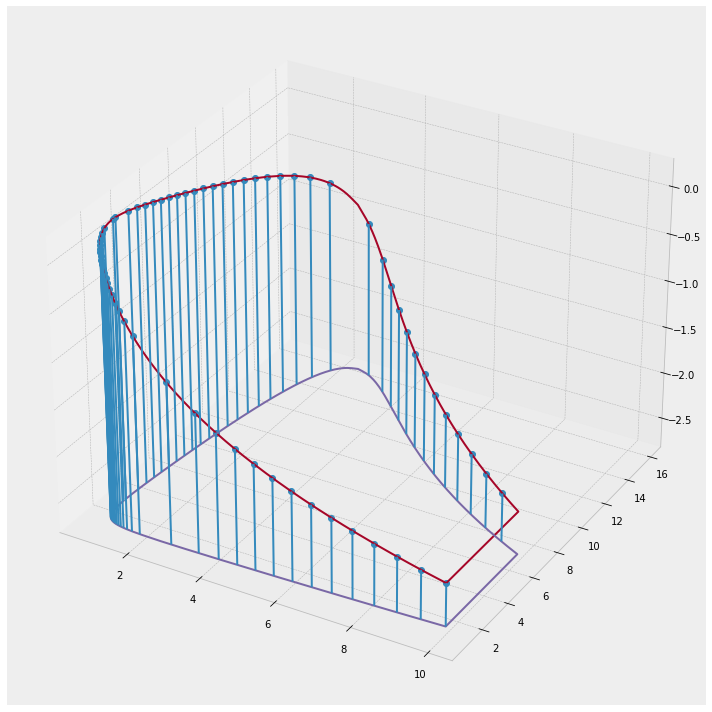

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.special.lambertw as lambertw
from mpl_toolkits.mplot3d import Axes3D

def isdiv(a, b):
    return -np.sum(a/b-np.log(a/b)-1)

def isgen(a):
    return -np.sum(np.log(a))
    
# Parametric Bregman IS ball of center (cx,cy) and radius r
def isball3D(cx, cy, r, nb=250):
    x = np.zeros(4*nb)
    y = np.zeros(4*nb)
    z = np.zeros(4*nb)
    du=r/(nb-1)
    # top left quadrant: (x1, y2)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[i]=-cx/np.real(lambertw(-np.exp(-u-1), k=-1))
        y[i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=0))
        z[i]=isgen(np.array(x[i],y[i]))
    # top right quadrant: (x2, y2)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[nb+i]=-cx/np.real(lambertw(-np.exp(-u-1), k=0))
        y[nb+i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=0))
        z[nb+i]=isgen(np.array(x[nb+i],y[nb+i]))
    # bottom right quadrant: (x2, y1)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[2*nb+i]=-cx/np.real(lambertw(-np.exp(-u-1), k=0))
        y[2*nb+i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=-1))
        z[2*nb+i]=isgen(np.array(x[2*nb+i],y[2*nb+i]))
    # bottom left quadrant: (x1, y1)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[3*nb+i]=-cx/np.real(lambertw(-np.exp(-u-1), k=-1))
        y[3*nb+i]=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=-1))
        z[3*nb+i]=isgen(np.array(x[3*nb+i],y[3*nb+i]))
    
    return x,y,z

def getcoord(cx, cy, r, u, quadrant):
    if quadrant == 0:
        x=-cx/np.real(lambertw(-np.exp(-u-1), k=-1))
        y=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=0))
    elif quadrant == 1:
        x=-cx/np.real(lambertw(-np.exp(-u-1), k=0))
        y=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=0))
    elif quadrant == 2:
        x=-cx/np.real(lambertw(-np.exp(-u-1), k=0))
        y=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=-1))
    else:
        x=-cx/np.real(lambertw(-np.exp(-u-1), k=-1))
        y=-cy/np.real(lambertw(-np.exp(-(r-u)-1), k=-1))
    
    return x,y

# Bregman ball center and radius
cx=2.5
cy=2.5
r=1

# parametric contour plot 
x1,y1 = isball(cx, cy, r, 250)
x,y,z = isball3D(cx, cy, r, 250)
z1 = np.ones(x1.shape) * np.min(z)

x2 = []
y2 = []
z2 = []
for a,b,c in zip(x,y,z):
    if a < 10:
        x2.append(a)
        y2.append(b)
        z2.append(c)
        
z4 = np.ones(np.array(z2).shape) * np.min(z)

# sample more inside
"""
samples = 200
for ss in np.arange(0,samples):
    rs = np.random.uniform(0, r)
    us = np.random.uniform(0, rs)
    quadrant = np.random.uniform(0,1)*4
    xs,ys = getcoord(cx,cy,rs,us,quadrant)
    np.append(x,xs)
    np.append(y,ys)
    np.append(z, isgen(np.array([xs,ys])))

from scipy.spatial import Delaunay
tri = Delaunay(np.array([x,y]).T)
"""

# figure
with plt.style.context("bmh"):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    #ax.stem(x[::20],y[::20],z[::20], basefmt=" ", bottom=np.min(z))
    #plt.plot(x,y,zs=z)
    #plt.plot(x1,y1,zs=z1)
    ax.stem(x2[::12],y2[::12],z2[::12], basefmt=" ", bottom=np.min(z))
    plt.plot(x2,y2,zs=z2)
    plt.plot(x2,y2,zs=z4)
    #ax.plot_trisurf(x, y, z, linewidth = 0.2, antialiased = True, edgecolor = 'grey') 
    #ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap=plt.cm.Spectral)
    plt.tight_layout()
    plt.savefig("isprof.pdf")
    plt.savefig("isprof.svg")
    plt.show()